## Before and after heating

##### Plot chosen compounds

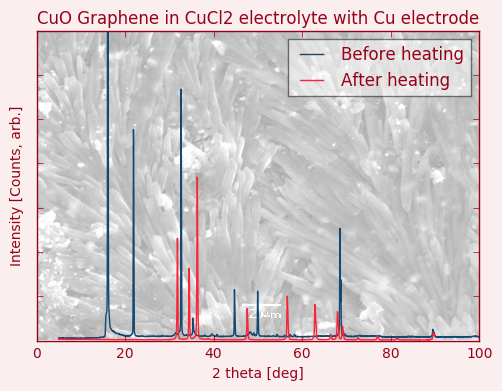

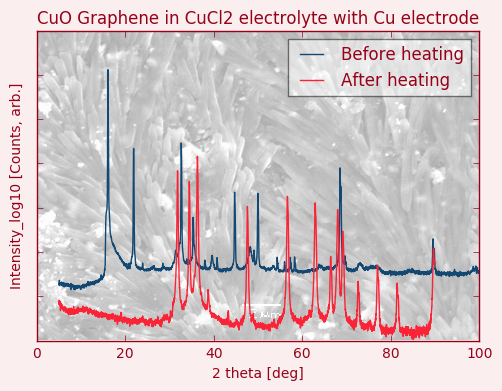

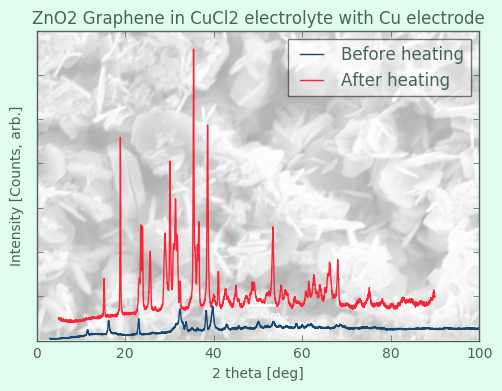

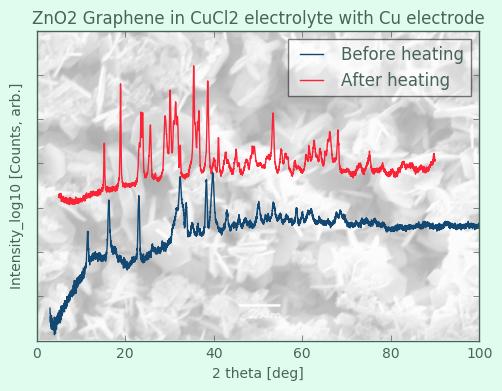

In [18]:
import itertools

availableFormulas = ['CuO','ZnO2']

chosenFormulas = [availableFormulas[0], availableFormulas[1]]
isLogarithmic = [False, True]
saveOnDisk = False
plotsColors = ['#124872', '#fa2436']

for x in list(itertools.product(availableFormulas, isLogarithmic)):
    plotBeforeAfterHeating(x[0], x[1], saveOnDisk, plotsColors)

##### Properties of metal oxides and plotting paramenters

In [2]:
def MetalOxide(x):
    return {
        'CuO': {'form':'CuO', 'mult':16, 'sub':42, 'bg':'#faeeee', 'color':'#960018', 'normult':0.00022 },
        'ZnO2': {'form':'ZnO2', 'mult':26, 'sub':56, 'bg':'#defdef', 'color':'#456456', 'normult':0.0019 },
    }[x]

##### X-Ray plots before and after heating on SEM background 

In [14]:
import csv
import matplotlib.pyplot as plt
from scipy.misc import imread
import numpy as np
from PIL import Image

def plotBeforeAfterHeating(oxideFormula, isLog, save, plotsColors):

    # Choose metal oxide to work with
    
    oxideParams = MetalOxide(oxideFormula)

    # Other parameters of the experiment
    electrolytes = ['CuCl2', 'FeCl3', 'ZnCl2'];
    electrodes = ['Cu', 'Zn', 'Steel'];

    # Choose if you should show data logarithmically scaled
    log10sufixes = ['', '_log10'] 
    if isLog:
        log10sufix = log10sufixes[1]
    else:
        log10sufix = log10sufixes[0]

    # Choose whether to show the figure inline or save to the computer
    toSave = save

    # Oxide's chemical formula 
    oxide = oxideParams['form']

    # Parameters to adjust plot's background image
    multiplier = oxideParams['mult']
    subtractor = oxideParams['sub']

    # Axis limits, fixed in order to display background image properly
    axisLimits = [0, 100, 0, 70]

    fileNames = [oxide + 'GPinCuCl2', oxide + 'CuCl2']
    
    fig=plt.figure(facecolor=oxideParams['bg'])

    # color used for title, legend, ticks, spines etc.
    themeColor = oxideParams['color']

    # Remove ticks from y axis
    ax = fig.add_subplot(111)
    ax.set_yticklabels([])
    plt.setp(ax.spines.values(), color=themeColor)
    ax.xaxis.label.set_color(themeColor)
    ax.yaxis.label.set_color(themeColor)
    ax.tick_params(colors=themeColor)

    for fn in range(len(fileNames)):
        x, y = [], []
        with open('xrd/' + fileNames[fn] + '.xy','r') as f:
            reader = csv.reader(f, delimiter='\t')
            for row in reader:
                x.append(row[0])
                y.append(row[1])

        # scale results depending on whether it is log or not
        if log10sufix:        
            y = [np.log10(float(i)) * multiplier - subtractor for i in y]
        else:
            y = [float(i) * oxideParams['normult'] for i in y]

        # Background image for the plot
        image=Image.open("SEM/" + oxide + "CuCl2.tif")
        plt.imshow(image, zorder=0, extent=axisLimits).set_alpha(0.2)

        # plot results
        plt.plot(x,y,plotsColors[fn])

    # Plot properties    
    plt.title(oxide + ' Graphene in ' + electrolytes[0] + ' electrolyte with ' + electrodes[0] + ' electrode', color=themeColor)
    plt.xlabel('2 theta [deg]', fontsize=10)
    plt.ylabel('Intensity' + log10sufix + ' [Counts, arb.]', fontsize=10)
    plt.axis(axisLimits)
    leg = plt.legend(['Before heating', 'After heating'])
    leg.get_frame().set_alpha(0.5) # set the alpha value of the legend: it will be translucent
    for text in leg.get_texts():
        text.set_color(themeColor)

    # show or save plot
    if toSave:
        plt.savefig('figures/before and after heating/' + oxide + 'GPinCuCl_before_and_after_SEM' + log10sufix + '.png', dpi=200, facecolor=fig.get_facecolor(), transparent=True)
    else:
        plt.show()

    # clear and close figures
    plt.clf()
    plt.close() 

## Rentgen comparison to database

In [ ]:
import csv
import matplotlib.pyplot as plt
from scipy.misc import imread
import numpy as np
from PIL import Image

x = []
y = []

with open('CuOGPinCuCl.xy','r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        x.append(row[0])
        y.append(row[1])

y = [np.log10(float(i))*20-66 for i in y]

fig = plt.figure(figsize=(10, 7), dpi=100)

matchFileNames = ['Atacamite', 'Botallackite', 'Copper Chloride Hydroxide', 'Copper Chloride', 
                  'Copper Methanol Chloride', 'Eriochalcite', 'Eriochalcite2', 'Paratacamite', 'Paratacamite2']

matchFileNamesTop = [['Atacamite', 'Cu2 + 2( OH ) 3Cl', '25%'], 
                     ['Copper Chloride Hydroxide', 'Cu Cl2 * 3 Cu ( O H )2', '24%'], 
                     ['Botallackite', 'Cu2 +2 Cl ( O H )3 ', '21%'],
                     ['Eriochalcite', 'Cu +2 Cl2 * 2 H2 O', '20%']]

matchFileNames = [['Atacamite']]

for mf in matchFileNames:
    
    # figure's title
#     fig.suptitle(r"GPCuO in CuCl2 vs " + mf[0] + " [" + mf[1] + "] " + mf[2] + " matched", fontsize=16)
    print(mf[0])
    #img = Image.open("cytherea.jpg"), 
    img = Image.open("graphs/" + mf[0] + "-1.png")
    img = img.crop( (116,1140,1587,2220) )
    #fig1, ax1 = plt.subplots()
    lines= plt.plot(x,y,'r', zorder=1)
    # ax1.set_yscale('log')
    plt.imshow(img, zorder=0, extent=[0, 100, 0, 66])
    plt.xlabel(r'2 theta', fontsize=16)
    plt.ylabel('Counts', fontsize=16)
    plt.show()
    #plt.savefig('figures/' + mf[0] + '_topmatch.png', transparent=True)
    

